*В данной работе рассматривался датасет с сайта kaggle, посвященный катастрофе Титаника в 1912 г. Исходя из данных предпологалась определить судьбу человека после крушения - выжил он или нет.*  
*Работу выполнил Баскин Лев.*

**План работы с данными:** 
* поверхностный анализ данных с помощью .info() и .describe() 
* проверка данных на полноту
* поверхностный анализ с помощью pivot-таблиц и гистограмм
* работа с проблемными данными и генерация новых признаков
* чистка данных
* применение различных моделей и сравение результатов

In [70]:
def write_answer(answer, method):
    index = range(892, 1310)
    output = pd.DataFrame(data=answer.astype(int), columns = ['Survived'])
    output.insert(0, 'PassengerId', index)
    name = f'answer_{method}.csv'
    output.to_csv(name, index = False)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [72]:
data = pd.read_csv('train.csv')
y_train = data['Survived']
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [73]:
data.drop(['PassengerId'], axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Проверим, насколько полны данные тренировочного и тестового датасета  

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
data_test = pd.read_csv('test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Заметим, что есть проблемы с наполнением у признаков 5 и 9. Координального отличия между полнотой тестового и тренировочного сета нет.  
Далее будем отдельно работать с категориальными и численными признаками.

In [76]:
data_cat = data[['Survived', 'Sex', 'Pclass', 'Ticket', 'Cabin', 'Embarked']]
data_num = data[['Fare', 'Parch', 'Age', 'SibSp']]

Посмотрим на распределение числовых признаков

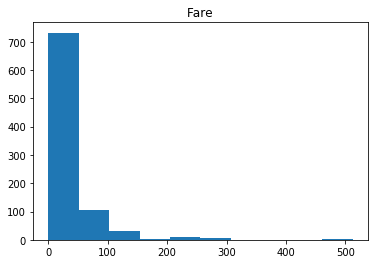

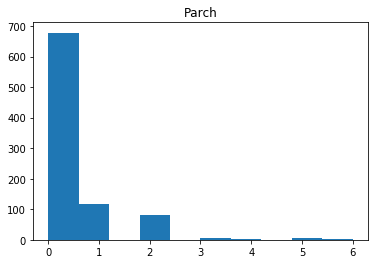

C:\Users\Lev\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lev\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


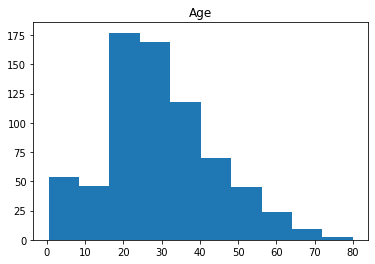

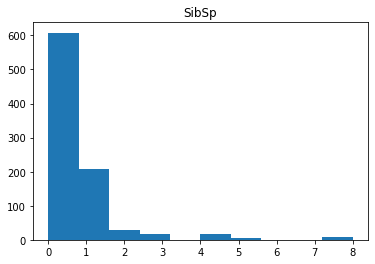

In [77]:
for col in data_num.columns:
    plt.hist(data_num[col])
    plt.title(col)
    plt.show()

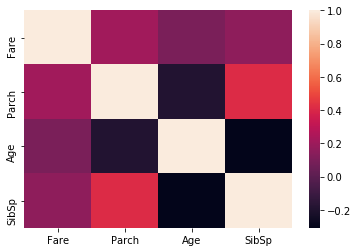

In [78]:
sns.heatmap(data_num.corr())

In [79]:
data_num.corrwith(data['Survived'])

Fare     0.257307
Parch    0.081629
Age     -0.077221
SibSp   -0.035322
dtype: float64

Видим, что признак Age имеет нормальное распределение, что очень хорошо. Недостающие значения можно заполнить средним значением.
При этом признак Fare нуждается в логарифмировании для выявления более чёткой картины.  
При этом признаки слабо коррелируют между собой, а это означает что дополнительный отбор среди них проводить не нужно.  
Рассмотрим категориальные признаки:

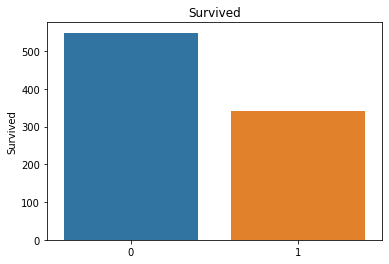

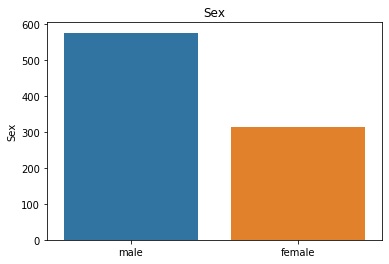

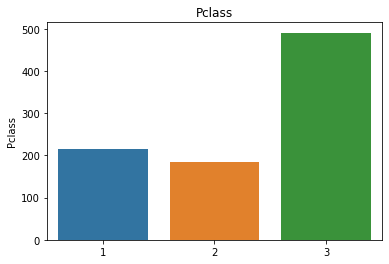

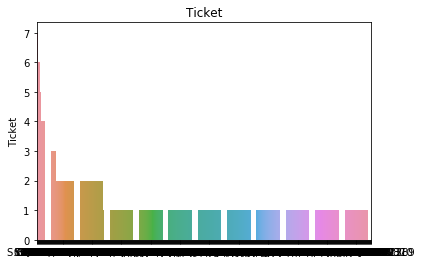

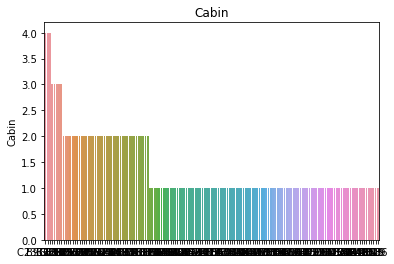

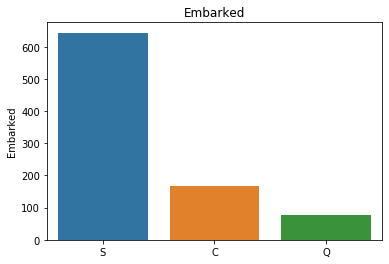

In [80]:
for col in data_cat.columns:
    sns.barplot(data_cat[col].value_counts().index, data_cat[col].value_counts()).set_title(col)
    plt.show()

Признаки Ticket и Cabin невозможно использовать в таком виде: нужна дополнительная обработка. 
Сделаем предположение, что наличие или отсутствие данных о каюте, а также первая буква кабины(определяла положение) влияли на выживаемость.  

In [81]:
data['cabin_combo'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else x[0])
pd.pivot_table(data, index = 'Survived', columns='cabin_combo', values = 'Name', aggfunc = 'count')

cabin_combo,0,A,B,C,D,E,F,G,T
Survived,,,,,,,,,
0,481.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0
1,206.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN


Действительно, отсутствие данных о занятом месте значительно повышает шансы на смертельных исход. Отметим это как первый новый признак.  
Далее посмотрим на структуру признака Ticket. Он принимает три типа значений - отсутствие значения, числовое или буквенно-числовое.

In [82]:
import re
data['Ticket_combo'] = data['Ticket'].apply(lambda x: 0 if (pd.isna(x) or x.isnumeric()) else re.split(r'[/. ]', x)[0])
pd.pivot_table(data, index = 'Survived', columns='Ticket_combo', values = 'Name', aggfunc = 'count')

Ticket_combo,0,A,A4,C,CA,F,Fa,LINE,P,PC,PP,S,SC,SCO,SO,SOTON,STON,SW,W,WE
Survived,,,,,,,,,,,,,,,,,,,,
0,407.0,26.0,1.0,18.0,13.0,2.0,1.0,3.0,1.0,21.0,1.0,12.0,6.0,1.0,NaN,15.0,10.0,NaN,10.0,1.0
1,254.0,2.0,NaN,15.0,1.0,4.0,NaN,1.0,1.0,39.0,2.0,2.0,7.0,NaN,1.0,2.0,8.0,1.0,1.0,1.0


Выделим список типов билетов, в которых количество выживжих составило менее 20%.  
А также выделим тип PC, имеющий аномальную выживаемость.  
Получим таким образом 2 новых признака.

In [83]:
deadly_list = ['A', 'CA', 'S', 'SOTON', 'W']
data['Ticket_Num'] = data['Ticket'].apply(lambda x: 1 if re.split(r'[/. ]', x)[0] in deadly_list else 0)

Следующая задача - вытащить информацию из имени человека. Единственный группируемый элемент - титул. Логично предположить, что титул в некотором смысле влиял на паттерн поведения и как следствие на выживаемость.

In [84]:
data['title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
#pd.pivot_table(data, index = 'Survived', columns = 'title', values = '\[\]')

Применим описанные выше изменения ко всем данным, а также преобразуем признаки PClass, Sex, Title, Embarked, Cabin в "бинарные" с помощью метода get_dummies.

In [85]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train['test'] = 0
data_test['test'] = 1
data_test['Survived'] = np.NaN
full_data = pd.concat([data_train, data_test])

In [86]:
#создадим новые признаки, описанные ранее
full_data['deadly_ticket'] = full_data['Ticket'].apply(lambda x: 1 if re.split(r'[/. ]', x)[0] in deadly_list else 0)
full_data['lively_ticket'] = full_data['Ticket'].apply(lambda x: 1 if re.split(r'[/. ]', x)[0] == 'PC' else 0)  
full_data['numeric_ticket'] = full_data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

#прологарифмируем признак для приведения его распределения к нормальному виду
full_data['Fare'].fillna(data_train['Fare'].median(), inplace = True)
full_data['log_Fare'] = np.log(full_data['Fare']+1)

#Подготовим для бинаризации имеющиеся признаки
full_data['Cabin'] = full_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else x[0])
full_data['Title'] = full_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

#Заполним пропуски признака Age и уберём 2 объекта из выборки
full_data['Age'] = full_data['Age'].fillna(data_train['Age'].median())
full_data.dropna(subset=['Embarked'],inplace=True)
                                             
#for i in range(1, 4):
#    subset = (full_data['Pclass'] == i)
#    print(f'Mean age in {i} class: {full_data.loc[subset, "Age"].mean()}')
#    full_data.loc[subset, 'Age'] = full_data.loc[subset, 'Age'].fillna(full_data.loc[subset, 'Age'].mean()) 
                                             
#произведём бинаризацию и уберём лишние признаки                                 
full_data = pd.concat([full_data, pd.get_dummies(full_data[['Pclass', 'Sex', 'Cabin', 'Title', 'Embarked']])], axis = 1)
full_data.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name', 'Pclass', 'Sex', 'Title'], axis = 1, inplace = True)
full_data

,Survived,Age,SibSp,Parch,test,deadly_ticket,lively_ticket,numeric_ticket,log_Fare,Sex_female,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,0,1,0,0,2.110213,0,...,0,1,0,0,0,0,0,0,0,1
1,1.0,38.0,1,0,0,0,1,0,4.280593,1,...,0,0,1,0,0,0,0,1,0,0
2,1.0,26.0,0,0,0,0,0,0,2.188856,1,...,0,0,0,0,0,0,0,0,0,1
3,1.0,35.0,1,0,0,0,0,1,3.990834,1,...,0,0,1,0,0,0,0,0,0,1
4,0.0,35.0,0,0,0,0,0,1,2.202765,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,28.0,0,0,1,1,0,0,2.202765,0,...,0,1,0,0,0,0,0,0,0,1
414,NaN,39.0,0,0,1,0,1,0,4.699571,1,...,0,0,0,0,0,0,0,1,0,0
415,NaN,38.5,0,0,1,1,0,0,2.110213,0,...,0,1,0,0,0,0,0,0,0,1
416,NaN,28.0,0,0,1,0,0,1,2.202765,0,...,0,1,0,0,0,0,0,0,0,1


Отмасштабируем количественные признаки:

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

full_data_scaled = full_data.copy()
full_data_scaled[['Age', 'log_Fare', 'SibSp', 'Parch']] = scaler.fit_transform(full_data_scaled[['Age', 'log_Fare', 'SibSp', 'Parch']])

Перед обучением моделей обратно разделим выборки:

In [88]:
X_train = full_data_scaled[:889].drop(['test', 'Survived'], axis = 1)
X_test = full_data_scaled[889:].drop(['test', 'Survived'], axis = 1)
y_train = full_data_scaled[full_data.test == 0].Survived
#list(X_train.columns)
#X_train.describe()
#X_test.describe()

Перейдём к обучению моделей.

**Логистическая регрессия**

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
cv = 5

grid_lr = GridSearchCV(estimator = lr, param_grid=param_grid, cv=cv)
grid_lr.fit(X_train, y_train)

print(f'Best params: {grid_lr.best_params_}')
score = cross_val_score(grid_lr, X_train, y_train, cv = 5)
print(f'cv_score:{score}, mean: {score.mean()}')
write_answer(grid_lr.predict(X_test), 'lr')

Best params: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
cv_score:[0.8258427  0.82022472 0.79213483 0.79775281 0.84180791], mean: 0.815552593156859


**Naive Bayes**

In [90]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

score = cross_val_score(gnb, X_train, y_train, cv = 5)
print(f'cv_score:{score}, mean: {score.mean()}')
write_answer(gnb.predict(X_test), 'Naive')

cv_score:[0.65730337 0.69662921 0.75842697 0.74157303 0.72316384], mean: 0.7154192852155145


**Метод KNN.**

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'p' : [1,2]}
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5)
grid_knn.fit(X_train,y_train)

print(f'Best params: {grid_knn.best_params_}')
score = cross_val_score(grid_knn, X_train, y_train, cv = 5)
print(f'cv_score:{cross_val_score(grid_knn, X_train, y_train, cv = 5)}, mean: {score.mean()}')
write_answer(grid_knn.predict(X_test), 'knn')

Best params: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
cv_score:[0.80898876 0.82022472 0.80898876 0.80337079 0.85310734], mean: 0.8189360756681268


**TreeClassifier**  
В качестве дополнения посмотрим на изменения качества в зависимости от глубины

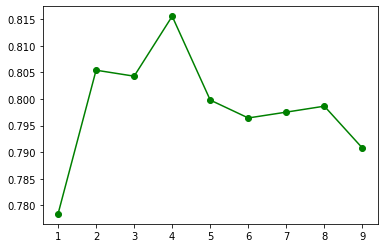

In [93]:
from sklearn.tree import DecisionTreeClassifier

sc = []
for i in range(1, 10):
    sc.append(cross_val_score(DecisionTreeClassifier(max_depth = i, random_state = 42), X_train, y_train, cv = 5).mean())


plt.plot(range(1, 10), sc, 'g-', marker = 'o', label = 'train')

Получаем, что оптимальная глубина - 4

In [94]:
dtr = DecisionTreeClassifier(max_depth = 4, random_state = 0)
dtr.fit(X_train, y_train)

score = cross_val_score(dtr, X_train, y_train, cv = 5)
print(f'cv_score:{score}, mean:{score.mean()}')
write_answer(dtr.predict(X_test), 'tree')
#Image(filename='score2.png')

cv_score:[0.83146067 0.79775281 0.81460674 0.79213483 0.84180791], mean:0.815552593156859


**Random Forest**  
Улучшим предыдущий метод и посмотрим на изменение качества в зависимости от глубины

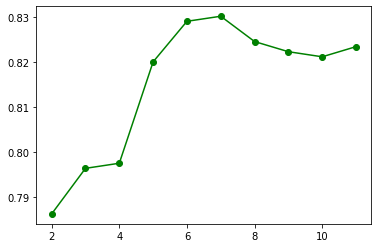

In [96]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(max_depth = i, random_state = 2)
rfc.fit(X_train, y_train)

sc = []
for i in range(2, 12):
    sc.append(cross_val_score(RandomForestClassifier(max_depth = i, random_state = 2), X_train, y_train, cv = 5).mean())

plt.plot(range(2, 12), sc, 'g-', marker = 'o', label = 'train')

In [97]:
rfc = RandomForestClassifier(max_depth = 7)
rfc.fit(X_train, y_train)

score = cross_val_score(rfc, X_train, y_train, cv = 5)
print(f'cv_score:{score}, mean: {score.mean()}')
write_answer(rfc.predict(X_test), 'random_forest')

cv_score:[0.84269663 0.82022472 0.8258427  0.80337079 0.8700565 ], mean: 0.8324382657271631


**SVC**  
Скорее всего, линейное ядро не даст качественного решения, поэтому будем пробовать полиномиальное и rbf ядро.

In [99]:
from sklearn.svm import SVC

param_grid = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1e-3, 1e-4],
               'kernel': ['rbf']},
              {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4]}]

svc_grid = GridSearchCV(SVC(), param_grid, scoring = 'accuracy')
svc_grid.fit(X_train, y_train)

print(f'Best parameters are: {svc_grid.best_params_}')
score = cross_val_score(svc_grid, X_train, y_train, cv = 5)
print(f'cv_score:{score}, mean: {score.mean()}')
write_answer(svc_grid.predict(X_test).astype(int), 'SVC')

Best parameters are: {'C': 10, 'degree': 2, 'kernel': 'poly'}
cv_score:[0.84831461 0.81460674 0.79775281 0.78089888 0.84180791], mean: 0.8166761886624769


В завершение посмотрим, как выглядит распределение точек при понижении размерности до 2 с помощью PCA.

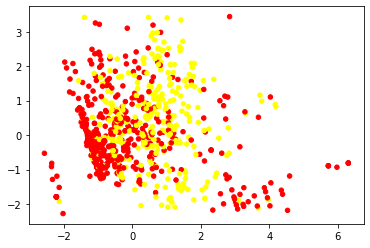

In [100]:
from sklearn.decomposition import PCA

model = PCA(n_components = 2)
X_PCA = model.fit_transform(X_train)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_train, s=20, cmap='autumn')

Видим, что классифицировать здесь ни с помощью линейных, ни с помощью полиномиальных ядер не получится. Слишком много дисперсии было потеряно при проекции. :(

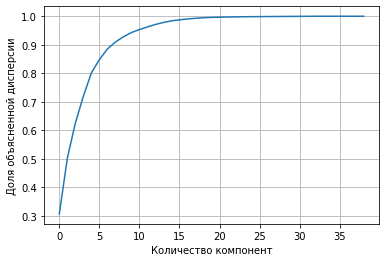

In [101]:
pca=PCA()  
pca_data=pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_  
cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(6,4))
plt.plot(cum_var_explained)   
plt.grid() 
plt.xlabel('Количество компонент') 
plt.ylabel('Доля объясненной дисперсии')  
plt.show()

\
Однако с помощью PCA можно сократить количество признаков до 15.

In [102]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

  ### Итоговые результаты

|Модель|Train|Test|
| :- | :- | :- |
|Логистическая регрессия| 0.816| 0.778|
|Naive Bayes| 0.715| 0.727|
|KNN| 0.819| 0.770|
|Решающее дерево| 0.819| 0.753|
|Random Forest| 0.834| 0.773|
|SVC| 0.817| 0.78|

*Метод SVC позволяет попасть в 20% лучших решений*